## Classification report

A Classification report is used to measure the __quality of predictions__ from a classification algorithm. <br>
More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.<br><br> 

- True Negative (TN): when a case was negative and predicted negative
- True Positive (TP): when a case was positive and predicted positive
- False Negative (FN): when a case was positive but predicted negative
- False Positive (FP): when a case was negative but predicted positive


Classification report of Iris dataset using the SVM algorithm:<br>




In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('datasets/iris.data', names=colnames)
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svclassifier = SVC(kernel='rbf', degree=2, gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=y.unique()))

(150, 4)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



The report shows the main classification metrics __precision__, __recall__ and __f1-score__ on a per-class basis. 

### Precision (what percent of your predictions were correct?)

__Precision__ is the ability of a classifier not to label an instance positive that is actually negative (i.e. the accuracy of positive predictions).<br>
For each class it is defined as the ratio of true positives to the sum of true and false positives.
<br>
Precision = TP/(TP + FP)

In [3]:
from sklearn.metrics import precision_score
print(f"Precision score: {precision_score(y_test, y_pred, average='micro')}")

Precision score: 0.9777777777777777


###  Recall (What percent of the positive cases did you catch?) 

__Recall__ is the ability of a classifier to find all positive instances (i.e. the fraction of positives that were correctly identified).<br> 
For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.<br>

Recall = TP/(TP+FN)

In [4]:
from sklearn.metrics import recall_score
print(f"Recall score: {recall_score(y_test,y_pred,average='micro')}")

Recall score: 0.9777777777777777


### F1 score (What percent of positive predictions were correct?)
 
The __F1 score__ is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. <br>
Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. <br>
As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
<br>

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [5]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(y_test,y_pred,average='micro')}")

F1 Score: 0.9777777777777777


The other reported information include: <br>
- __macro average__ (averaging the unweighted mean per label), 
- __weighted average__ (averaging the support-weighted mean per label)
- __accuracy__ (the fraction of predictions our model got right: (tp+tn)/(tp+tn+fp+fn))

## Confusion Matrix

A __confusion matrix__ visualises classification accuracy and errors made by a machine learning model. <br>
They are especially useful where there are multiple classification categories. <br>
Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The Scikit-Learn function __confusion_matrix()__ returns a confusion matrix and it is possible to use a plotting library to plot it if we want to.

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')]

[Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2')]

(3.0, 0.0)

Text(33.0, 0.5, 'True label')

Text(0.5, 15.0, 'Predicted label')

Text(0.5, 1, 'Confusion Matrix')

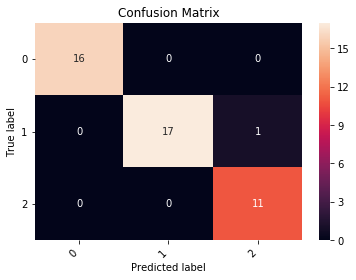

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
hmap=sns.heatmap(cnf_matrix, annot=True, fmt='d')
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=45, ha='right')
bottom, top = hmap.get_ylim() # to correct a bug with matplotlib 3.1.1
hmap.set_ylim(bottom + 0.5, top - 0.5) # to correct a bug with matplotlib 3.1.1
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

## Regression Error Metrics

The quality of a __regression model__ is how well its predictions match up against actual values.
<br>Several error metrics exist to judge the quality of a model and enable us to compare regresssions against other regressions with different parameters.<br>
Several kind of regressions do exist, here are some metrics related to the linear regression:

- Mean Absolute Error (MAE)
- Mean Square Error (MSE)
- Root Mean Squared Error (RMSE)


### Mean absolute error
The __mean absolute error (MAE)__ calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out, and then take the average of all these residuals.<br>
The picture below is a graphical description of the MAE. The green line represents our model’s predictions, and the blue points represent our data.

<img src="mae.jpg" alt="Mean Absolute Error" title="MAE" width=400 height=400 />

A small MAE (compared to the feature range) suggests the model is great at prediction (0 means that your model is a perfect predictor), while a large MAE suggests that your model may have trouble in certain areas.

### Mean square error

The __mean square error (MSE)__ is just like the MAE, but squares the difference before summing them all instead of using the absolute value.<br> 
Since the errors are squared before they are averaged, the MSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. <br>
__Note__: outliers in the data will contribute to much higher total error in the MSE than they would the MAE.

### Root Mean square error

The __root mean squared error (RMSE)__ is the square root of the MSE. <br>
Because the MSE is squared, its units do not match that of the original output. RMSE converts the error metric back into similar units, making interpretation easier. <br>
Since the MSE and RMSE both square the residual, they are similarly affected by outliers. <br>
The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out.